#TAG SMART EMAILS

GENSIM AND LDA

https://radimrehurek.com/gensim/apiref.html

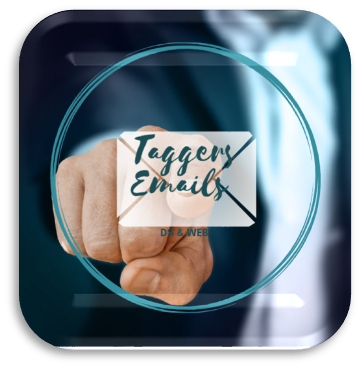

In [0]:
from PIL import Image
# load the image
logo = Image.open('tagsemailslogo.png')
logo

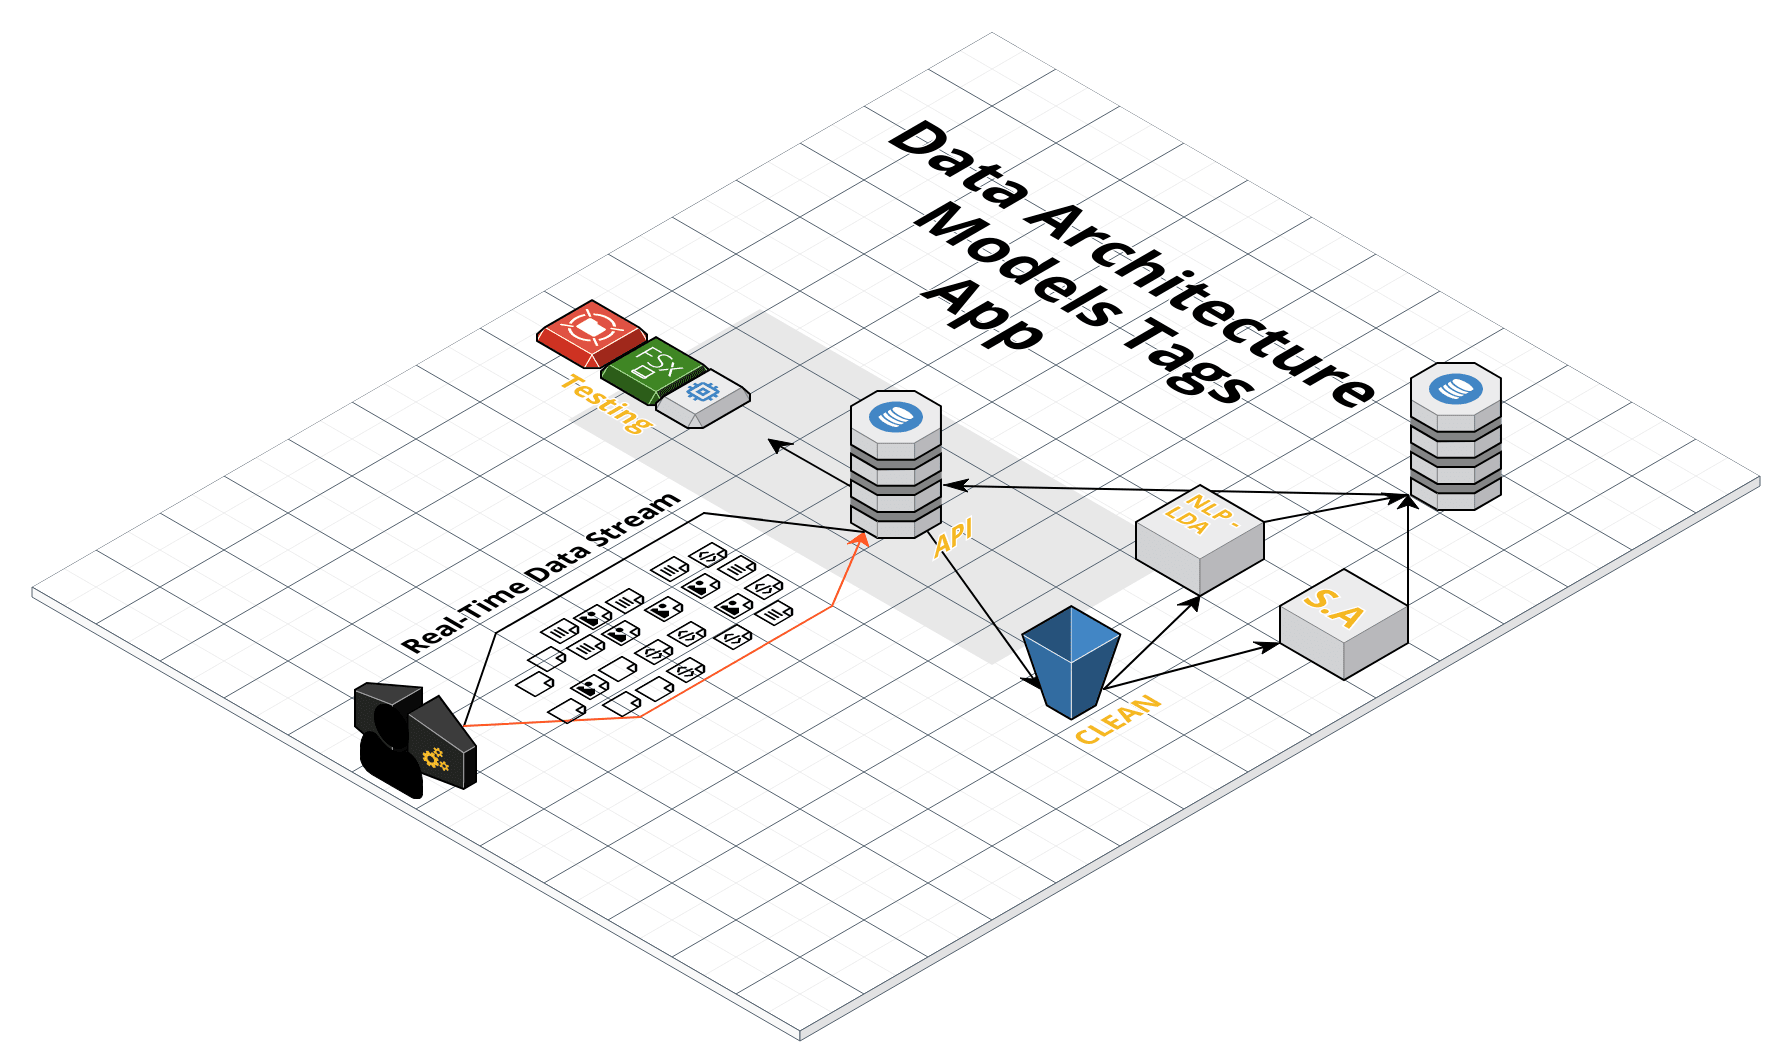

In [2]:
from PIL import Image
# load the image
Arquitecture = Image.open('Streaming Data Architecture.png')
Arquitecture

In [0]:
#Library
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import spacy
import pandas as pd

In [0]:
%pwd

'C:\\Users\\HomePC\\tagger-ds'

In [0]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2FK3OPVHW7HTK5AKZS624Z7U'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [0]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [0]:
#TO GET EMAIL BODY
[s.strip() for s in df['message'][1].splitlines()]

['Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>',
 'Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: john.lavorato@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.',
 '',
 'As far as the business meetings, I think it would be more productive to try and stimulate discussions across

In [0]:
email = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [0]:
#CLEAN EMAIL BODY
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['email_body'] = df['message'].apply(cleanemail)

df.head()

,file,message,email_body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes th...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the sal..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [0]:
#CLEAN HTML
import re
import html

def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['email_body'] = df['email_body'].apply(cleanup_html)

In [0]:
#CLEAN DATA
#remove whitespace
df['email_body'] = df['email_body'].str.strip().str.lower()

#Start with date
df['email_body'].str.match('\d?\d/\d?\d/\d{4}').all()

#Replace all non-overlapping matches
df['email_body'] = df['email_body'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [0]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#Getting Stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# define additional stop words
import nltk
import spacy

nlp = spacy.load('en_core_web_lg')
STOP_WORDS = nlp.Defaults.stop_words.union(my_stop_words)

stop = stopwords.words('english')
sno = SnowballStemmer('english')
print (stop)
print('***************************************')
print(sno.stem('tasty'))

STOP_WORDS = list(STOP_WORDS)
print('\n'.join([word for word in STOP_WORDS[:10]]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
tokens = []
for doc in nlp.pipe(df['email_body'], batch_size=500):

    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [0]:
df['tokens'].head()

0                                           [forecast]
1    [travel, business, meeting, take, fun, trip, e...
2                              [test, successful, way]
3    [randy, send, schedule, salary, level, schedul...
4                                [let, shoot, tuesday]
Name: tokens, dtype: object

In [0]:
id2word = Dictionary(df['tokens'])
print(len(id2word))

45973


In [0]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

14978


In [0]:
#https://radimrehurek.com/gensim/corpora/dictionary.html

corpus = [id2word.doc2bow(d) for d in df['tokens']]

In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=12
                  )

In [0]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)

In [0]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

In [0]:
topics = [' '.join(t[0:5]) for t in words]

In [0]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n")

------ Topic 0 ------
enron subject thank john contract
------ Topic 1 ------
john subject buy enron send
------ Topic 2 ------
image email message subject click
------ Topic 3 ------
email gas john request wine
------ Topic 4 ------
pm phillip subject new forward
------ Topic 5 ------
market iso john subject pm
------ Topic 6 ------
john subject phillip pm cc
------ Topic 7 ------
enron say company power market
------ Topic 8 ------
loan cost say company subject
------ Topic 9 ------
pm subject send email john


In [0]:
!pip install pyLDAvis
import pyLDAvis

In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.141798 -0.003129       1        1  27.014420
6     -0.011389  0.076114       2        1  13.364538
2     -0.043526  0.056293       3        1  10.785114
0      0.035586  0.031039       4        1   9.362778
9     -0.113881  0.034605       5        1   8.965400
3     -0.071990 -0.122323       6        1   7.522446
5     -0.003576 -0.020676       7        1   6.782044
4      0.021141  0.019387       8        1   5.825484
1     -0.026096 -0.024857       9        1   5.817935
8      0.071931 -0.046453      10        1   4.559837, topic_info=         Term          Freq         Total Category  logprob  loglift
173        pm   8787.000000   8787.000000  Default  30.0000  30.0000
2674    image   3489.000000   3489.000000  Default  29.0000  29.0000
959     email   5898.000000   5898.000000  Default  28.0000  28.0000
208     enron  11436.000000  11436.000000  Default  27.0000  27.0000
193   subject   7895.000000   7895.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
692    credit    131.992462   1833.543213  Topic10  -6.0181   0.4566
125       day    137.110092   2796.380371  Topic10  -5.9800   0.0726
134    energy    140.000153   3672.959473  Topic10  -5.9592  -0.1792
141       gas    142.956833   4951.703613  Topic10  -5.9383  -0.4571
975      week    133.405716   3094.687744  Topic10  -6.0074  -0.0562

[936 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
90        1  0.032786       
90        2  0.342255       
90        3  0.134343       
90        4  0.037584       
90        5  0.173527       
...     ...       ...    ...
5226      6  0.023940  zdnet
5226      7  0.035911  zdnet
5226      8  0.005985  zdnet
5226      9  0.005985  zdnet
5226     10  0.023940  zdnet

[5001 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 1, 10, 4, 6, 5, 2, 9])

In [0]:
#'corpus'

distro = [lda[d] for d in corpus]

num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [0]:
#Correlated
topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.033339,0.033338,0.533262,0.033338,0.033338,0.033339,0.033338,0.033338,0.033338,0.033338,0.033338,0.033338,0.033338,0.033338,0.033338,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254033,0.057943,0.000000,0.000000,0.000000,0.000000,0.000000,0.674670,0.000000,0,0,0,0,0
2,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.016672,0.545097,0.238171,0.016672,0,0,0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.503627,0.000000,0.442187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
4,0.016670,0.016670,0.016670,0.016670,0.016670,0.016670,0.766621,0.016670,0.016670,0.016670,0.016670,0.016670,0.016670,0.016670,0.016670,0,0,0,0,0


In [0]:
df['email_body'] = topics.idxmax(axis=1)

#Topic  
df['email_body'].describe()

count    10000.000000
mean         8.099300
std          3.886174
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         14.000000
Name: email_body, dtype: float64

In [0]:
df['email_body'].value_counts()

13    1737
9     1434
6     1064
5      893
4      857
8      782
12     717
1      462
10     440
14     392
7      290
11     257
3      242
2      218
0      215
Name: email_body, dtype: int64

Json and CSV

In [0]:
def save_data_frame_as_csv(df=None, file=None):
    """
    Save a Pandas DataFrame to CSV format.
    """
    try:
        if not file.endswith('.csv'):
            file += '.csv'
        df.to_csv(file, index=False)
        print(f'DataFrame saved as: {file}')
    except Exception as e:
        print("DataFrame couldn't be saved: ", sys.exc_info()[0])
        raise

In [0]:
save_data_frame_as_csv(df, './merged_data.csv')

In [0]:
def save_data_frame_as_json(df=None, file=None, orient='records'):
  """
  Save a Pandas DataFrame to Json format.
  """
  try:
    if not file.endswith('.json'):
      file += '.json'
    df.to_json(file, orient=orient)
    print(f'Dataframe saved as: {file}')
  except Exception as e:
    print("Dataframe couldn't be saved: ", sys.exc_info()[0])
    raise

In [0]:
save_data_frame_as_json(df, '.merged_data.json', orient='records')